In [1]:
import numpy as np
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
from bs4 import BeautifulSoup
data = pd.read_csv('albumlist.csv', delimiter = ',', encoding = 'latin1')

In [2]:
URL0 = 'https://www.discogs.com/lists/NME-Top-500-Albums-2013/188784?page=1&limit=250'
URL1 = 'https://www.discogs.com/lists/NME-Top-500-Albums-2013/188784?limit=250&page=2'
URL2 = 'https://www.nme.com/photos/the-500-greatest-albums-of-all-time-500-401-1426363'
URL3 = 'https://www.nme.com/photos/the-500-greatest-albums-of-all-time-400-301-1426436'
URL4 = 'https://www.nme.com/photos/the-500-greatest-albums-of-all-time-300-201-1426482'
URL5 = 'https://www.nme.com/photos/the-500-greatest-albums-of-all-time-200-101-1426258'
URL6 = 'https://www.nme.com/photos/the-500-greatest-albums-of-all-time-100-1-1426116'

page0 = requests.get(URL0)
page1 = requests.get(URL1)
page2 = requests.get(URL2)
page3 = requests.get(URL3)
page4 = requests.get(URL4)
page5 = requests.get(URL5)
page6 = requests.get(URL6)

In [50]:
#web mining titles of albums and artists
#pages 0 and 1
#soups
soup0 = BeautifulSoup(page0.text)
soup1 = BeautifulSoup(page1.text)
soup2 = BeautifulSoup(page2.text)
soup3 = BeautifulSoup(page3.text)
soup4 = BeautifulSoup(page4.text)
soup5 = BeautifulSoup(page5.text)
soup6 = BeautifulSoup(page6.text)


#page0
list_items = soup0.find('ol', {'class': 'as_table_block'})
items = list_items.find_all('div', {'class': 'listitem_data'})

albums = []
for item in items:
    line = item.find('h3')
    closing_in = line.find('a')
    albums.append(closing_in.text)
    
#page1
list_items = soup1.find('ol', {'class': 'as_table_block'})
items = list_items.find_all('div', {'class': 'listitem_data'})

for item in items:
    line = item.find('h3')
    closing_in = line.find('a')
    albums.append(closing_in.text)
    
#split albums list of lists into a list of tuples first   
#create df for nme data
for i in range(500):
    albums[i] = albums[i].split('-')
albums = [tuple(l) for l in albums]
nme = pd.DataFrame(albums, columns = ['Artist' , 'Album','c','d'])

#cleaning nme df
rank = [i+1 for i in range(500)]
nme['Rank'] = rank 
nme.at[29, 'Artist'] = 'Wu-Tang Clan'
nme.at[29, 'Album'] = 'Enter The Wu-Tang (36 Chambers)'
del nme['c']
del nme['d']

#web mining years of nme data
#pages 2 - 6
nme_years = []

#page2
items = []
list_items = soup2.find('div', {'class': 'td_smart_list_2 td-2-columns '})
items = list_items.find_all('div', {'class': 'td-item'})
i=0

for item in items:
    if i == 19: 
        nme_years.append('2004')
        i+=1
        continue
    if i == 43: 
        nme_years.append('2003')
        i+=1
        continue
    i+=1
    line =item.find('span', {'class': 'td-sml-description'})
    s = line.text
    nme_years.append(s[s.find("(")+1:s.find(")")])
    
#page3
items = []
list_items = soup3.find('div', {'class': 'td_smart_list_2 td-2-columns '})
items = list_items.find_all('div', {'class': 'td-item'})
i=0
for item in items:
    if i == 19:
        nme_years.append('1980')
        i+=1
        continue
    i+=1
    line =item.find('span', {'class': 'td-sml-description'})
    s = line.text
    nme_years.append(s[s.find("(")+1:s.find(")")])
    
#page4
items = []
list_items = soup4.find('div', {'class': 'td_smart_list_2 td-2-columns '})
items = list_items.find_all('div', {'class': 'td-item'})
i=0
for item in items:
    if i == 93:
        nme_years.append('1971')
        i+=1
        continue
    i+=1
    line =item.find('span', {'class': 'td-sml-description'})
    s = line.text
    nme_years.append(s[s.find("(")+1:s.find(")")])

#page5
items = []
list_items = soup5.find('div', {'class': 'td_smart_list_2 td-2-columns '})
items = list_items.find_all('div', {'class': 'td-item'})
i=0
for item in items:
    i+=1
    line =item.find('span', {'class': 'td-sml-description'})
    s = line.text
    nme_years.append(s[s.find("(")+1:s.find(")")])

#page6
items = []
list_items = soup6.find('div', {'class': 'td_smart_list_2 td-2-columns '})
items = list_items.find_all('div', {'class': 'td-item'})
i=0
for item in items:
    if i == 33: 
        nme_years.append('1995')
        i+=1
        continue
    if i == 70 : 
        nme_years.append('1993')
        i+=1
        continue
    i+=1
    line =item.find('span', {'class': 'td-sml-description'})
    s = line.text
    nme_years.append(s[s.find("(")+1:s.find(")")])

#add year data to nme df
nme_years.reverse()
nme_years = [int(i) for i in nme_years]
nme['Year'] = nme_years 

#number of albums on year plot
year_arr = [year for year in data['Year']]
year_count = Counter(year_arr)
year_key = [year for year in year_count]
year_value = [year_count[year] for year in year_count]

nme_year = [year for year in nme['Year']]
nme_year_count = Counter(nme_year)
nme_year_key = [year for year in nme_year_count]
nme_year_value = [nme_year_count[year] for year in nme_year_count]

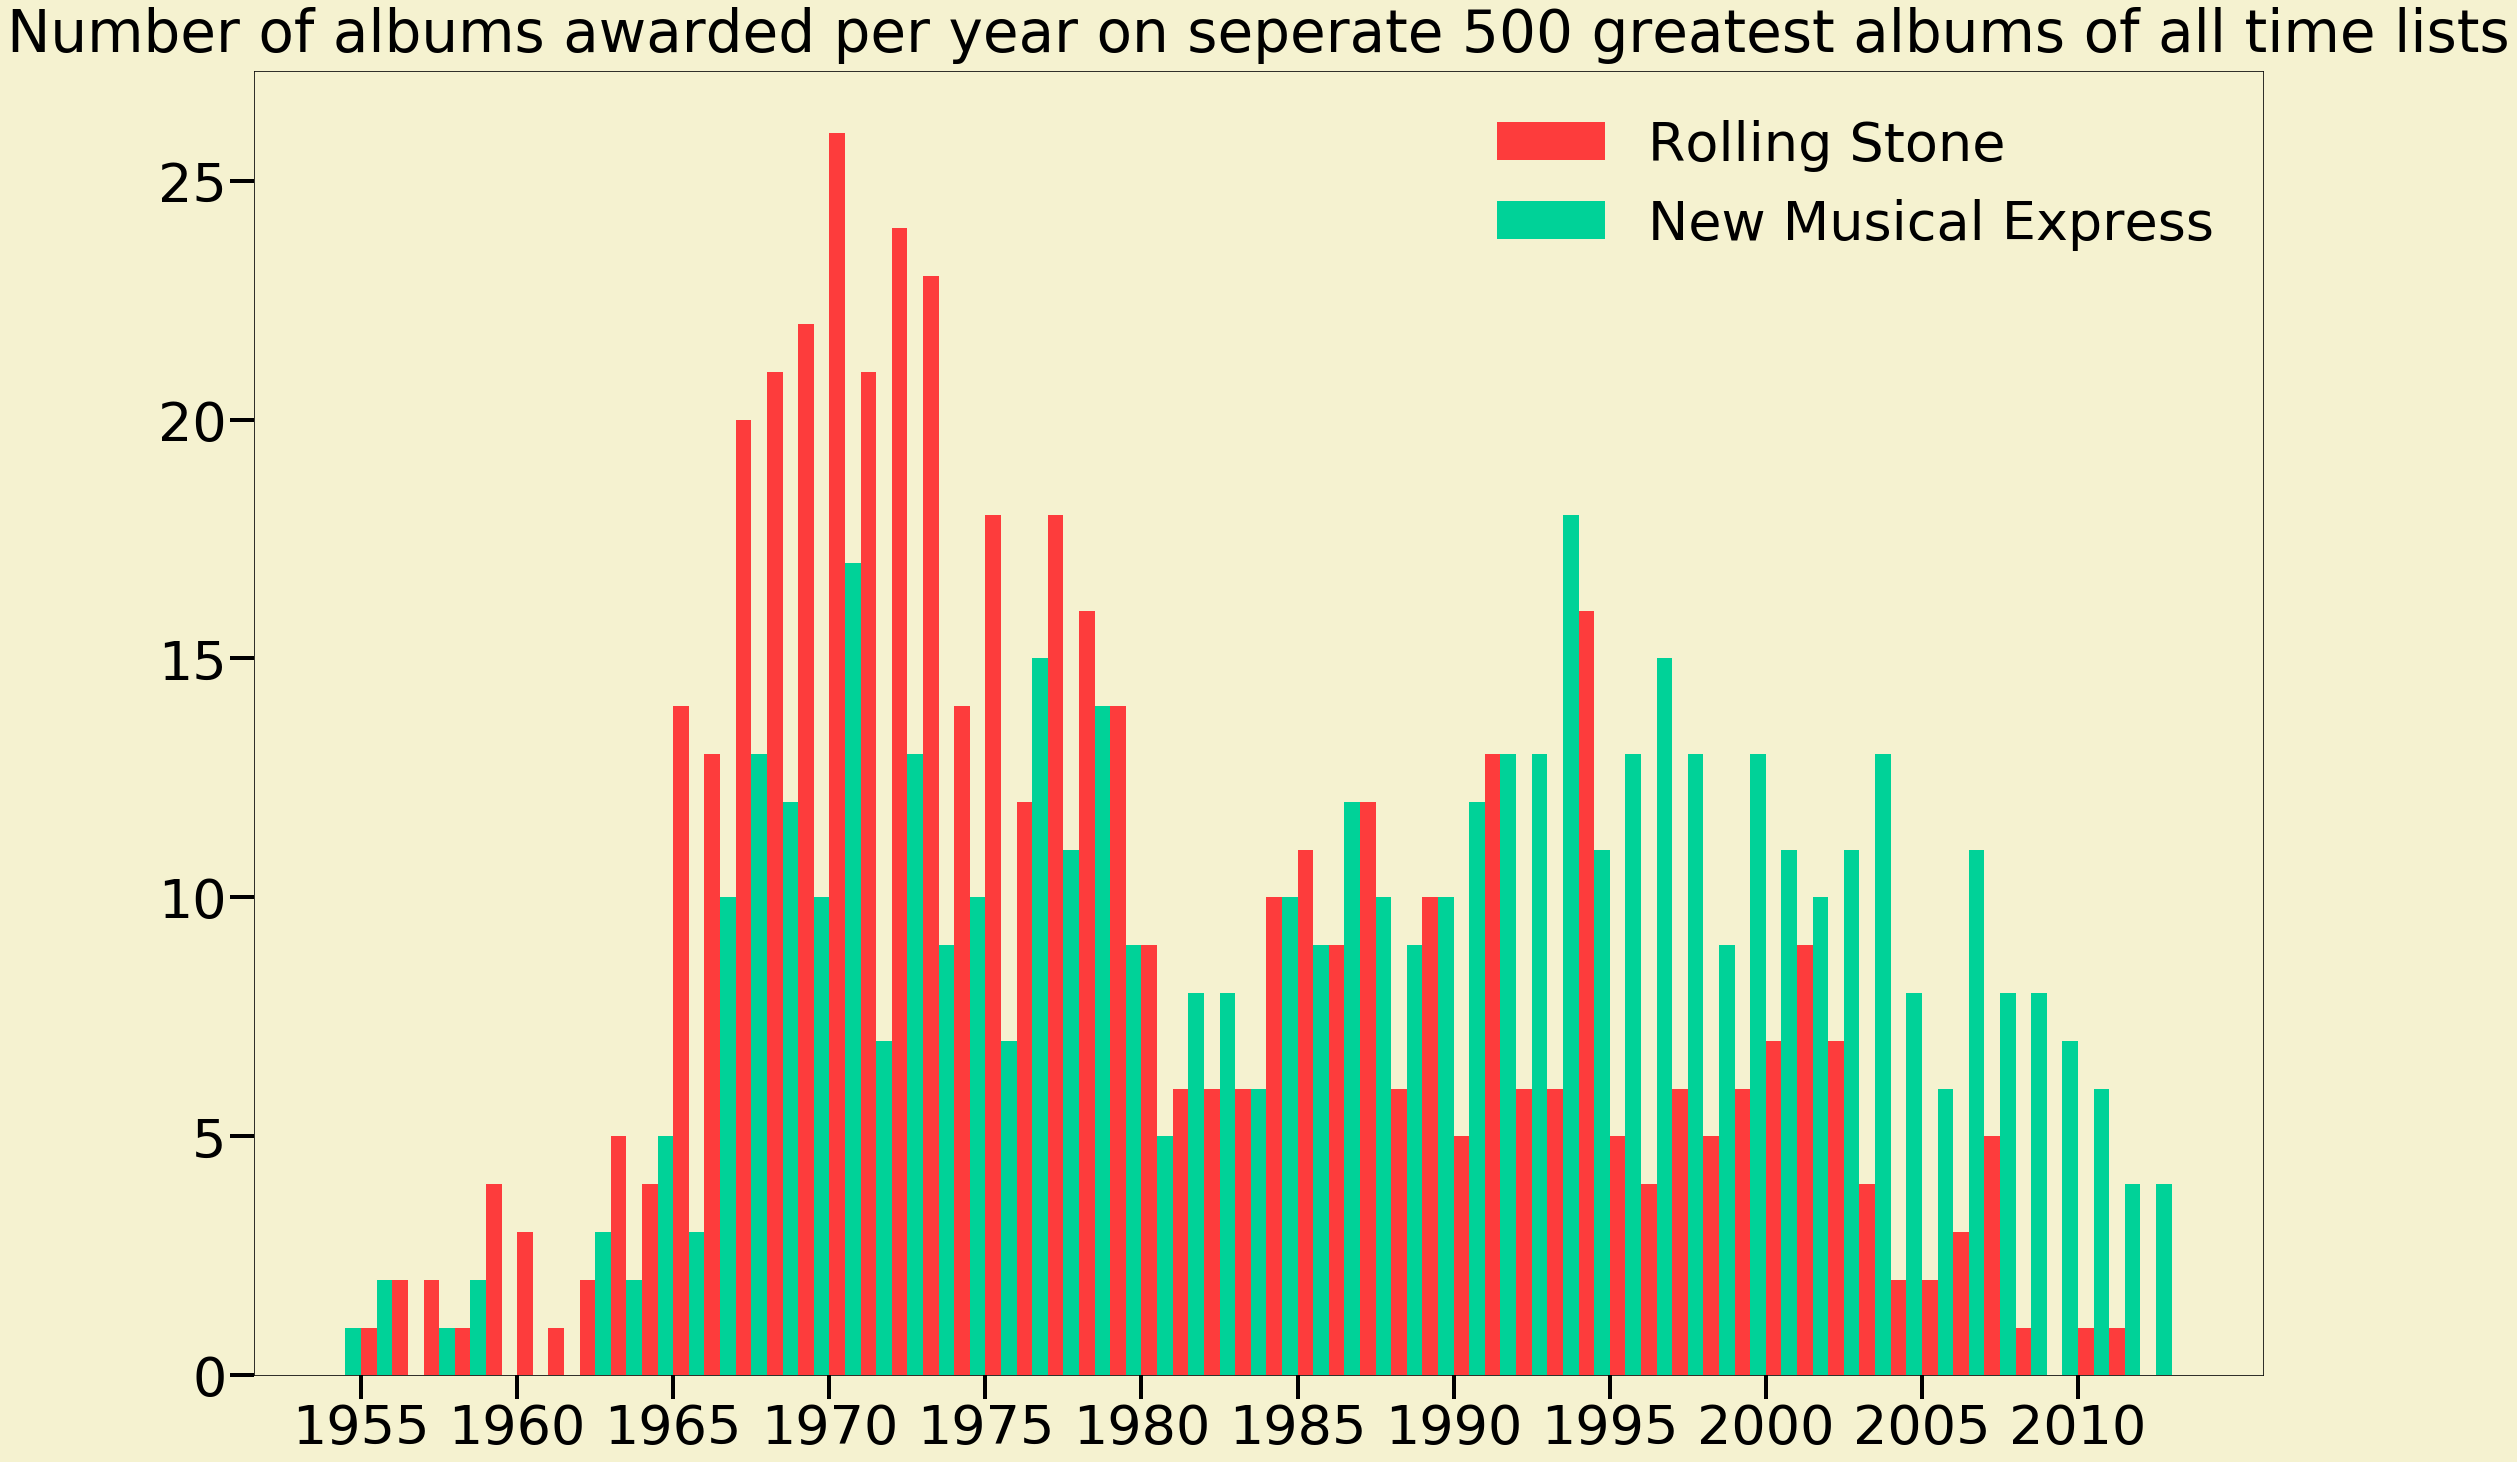

In [54]:
#figure 
fc = '#f5f2d0'

fig = plt.figure(figsize=(36,24), facecolor= fc)
ax0 = fig.add_subplot(1, 1, 1)
ax0.set_title("Number of albums awarded per year on seperate 500 greatest albums of all time lists", fontsize = 58, y = 1.01)
ax0.bar(year_key, year_value, color = '#fd3c3c', width = 0.5, align = 'edge', label = 'Rolling Stone')
ax0.bar(nme_year_key, nme_year_value, color = '#00d298', width = -0.5, align = 'edge', label = 'New Musical Express')
ax0.legend(facecolor = fc, frameon = False, fontsize = 54)
ax0.tick_params(labelsize = 54, length = 24, width = 4)
ax0.set_facecolor(fc)
ax0.set_xticks(np.arange(min(year_key), max(year_key)+1, 5.0))

In [55]:
fig.savefig('album_graph.png', facecolor = fig.get_facecolor())